# Name: Devanshu Sawarkar
# PRN: 22070521090
# SEC: C

# Simple Linear Regression

## Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

## Load the dataset

In [ ]:
df = pd.read_csv("StudentsPerformance.csv")

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.isnull().sum().sum()

0

## Select features for Simple Linear Regression

In [5]:
# We'll predict 'writing score' based on 'reading score'
X = df[['reading score']]   # Independent variable
y = df['writing score']        # Dependent variable

## Split the dataset into training and testing

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Create and train the model

In [7]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## Predict on test data

In [8]:
y_pred = model.predict(X_test)

## Evaluate the model

In [9]:
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))

Mean Squared Error: 23.870380714185085
R^2 Score: 0.9009597530871629


## Visualize the regression line

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


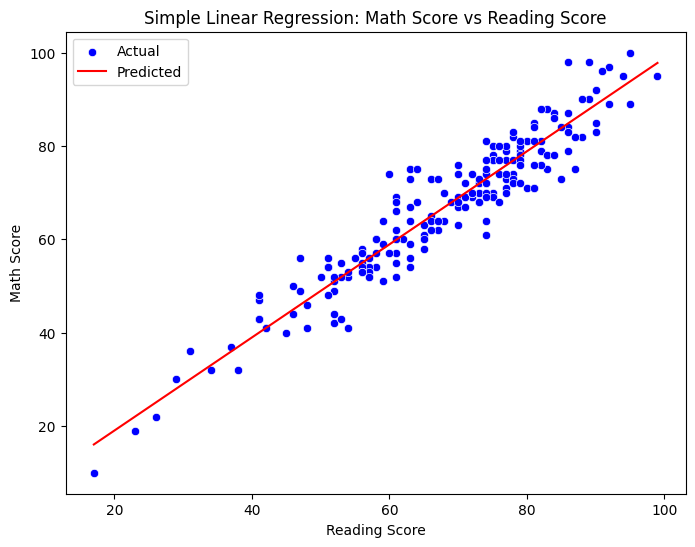

In [10]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_test['reading score'], y=y_test, color='blue', label='Actual')
sns.lineplot(x=X_test['reading score'], y=y_pred, color='red', label='Predicted')
plt.title("Simple Linear Regression: Math Score vs Reading Score")
plt.xlabel("Reading Score")
plt.ylabel("Math Score")
plt.legend()
plt.show()

# Multiple Linear Regression

## Import Libraries

In [11]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

## Load the dataset

In [12]:
df = pd.read_csv("/kaggle/input/students-performance-in-exams/StudentsPerformance.csv")

## Choose features (independent variables) and target (dependent variable)

In [13]:
X = df[['reading score', 'writing score']]  # Multiple features
y = df['math score']                        # Target variable

## Split into training and testing sets

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Create and train the model

In [15]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## Predict on test data

In [16]:
y_pred = model.predict(X_test)

## Evaluate the model

In [19]:
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))

n = len(y)
p = X.shape[1]
adjusted_r_squared = 1 - (1 - r2_score(y_test, y_pred)) * ((n - 1) / (n - p - 1))

print("Adjusted R² Score:", adjusted_r_squared)

Mean Squared Error: 77.24297821278955
Adjusted R² Score: 0.6819329418552859


## Show coefficients

In [20]:
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

Intercept: 7.85940588782988
Coefficients: [0.57555997 0.27176146]
